In [159]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, datasets, preprocessing

In [160]:
# Loading the dataset

dataset = datasets.load_iris()
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [161]:
# Creating the dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.drop(['petal width (cm)', 'sepal width (cm)'], axis = 1, inplace = True)
df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


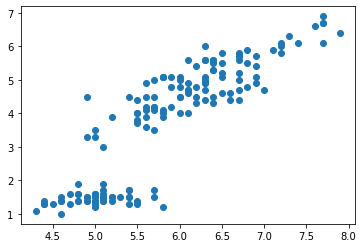

In [162]:
# Plotting scatter plot

plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.show()

In [163]:
# Scaling the data (normalizing)

X = df.drop('petal length (cm)', axis = 1).values
y = df['petal length (cm)'].values

scaler = preprocessing.MinMaxScaler()

scaler.fit(X)
df['sepal length (cm)'] = scaler.transform(X)

scaler.fit(y.reshape(-1, 1))
df['petal length (cm)'] = scaler.transform(y.reshape(-1, 1))

df.head()

,sepal length (cm),petal length (cm)
0,0.222222,0.067797
1,0.166667,0.067797
2,0.111111,0.050847
3,0.083333,0.084746
4,0.194444,0.067797


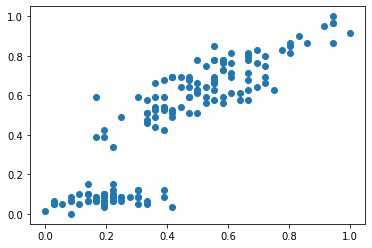

In [164]:
# Plotting scatter plot after scaling features

X = df.drop('petal length (cm)', axis = 1).values
y = df['petal length (cm)'].values

plt.scatter(df['sepal length (cm)'], df['petal length (cm)'])
plt.show()

In [165]:
# Splitting the data into training and testing data

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [166]:
# Fitting the data and training the model

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

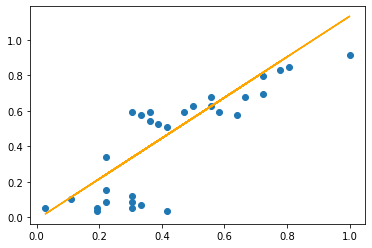

In [167]:
y_predicted = model.predict(X_test)
x = X_test.reshape(-1)

plt.scatter(x, y_test)
plt.plot(x, y_predicted, color = "orange")
plt.show()

In [168]:
# Checking the accuracy of the model

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

### Training Score > Testing Score (Slightly overfits the data)

0.7796115790873629
0.6662264513359455


In [177]:
# Using Lasso Regression (L1 Regularization)

model = linear_model.Lasso(alpha = 2, tol = 0.1, max_iter = 10000)

model.fit(X_train, y_train)

Lasso(alpha=2, max_iter=10000, tol=0.1)

In [210]:
# Using Ridge Regression (L2 Regularization)

model = linear_model.Ridge(alpha = 5, tol = 0.1)

model.fit(X_train, y_train)

Ridge(alpha=5, tol=0.1)

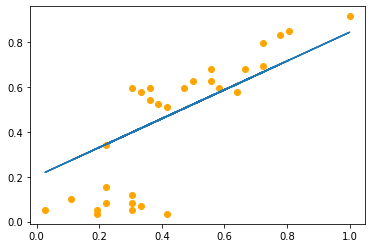

In [211]:
# Making predictions with Ridge Regression

y_predicted = model.predict(X_test)

plt.scatter(X_test.reshape(-1), y_test, color = "orange")
plt.plot(X_test.reshape(-1), y_predicted)
plt.show()

In [212]:
# Checking the accuracy of the model

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6287831339458223
0.5551586529109518
